In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import scipy.stats

from scipy.stats import poisson

Populating the interactive namespace from numpy and matplotlib


### Generate 1000 Samples of Size 1000 Following the Poisson Distribution and Plot a Sample and All Samples

In [2]:
np.random.seed(seed = 88)

In [3]:
N = 1000
n = 1000
lam = 69
data = np.zeros((N, N))
for i in range (0, N):
    sample = np.random.poisson(lam, size = n)
    data[i] = sample

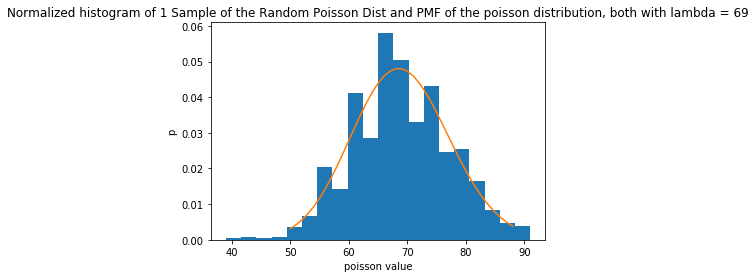

In [4]:
pl.hist(data[1], bins=20, normed = True)

pl.xlabel("poisson value")
pl.ylabel("p")
pl.title("Normalized histogram of 1 Sample of the Random Poisson Dist and PMF of the poisson distribution, \
both with lambda = 69")

x = np.arange(poisson.ppf(.01, lam), poisson.ppf(.99, lam))


pl.plot(x, scipy.stats.poisson.pmf(x, lam), '-', ms=8, label='poisson pmf')

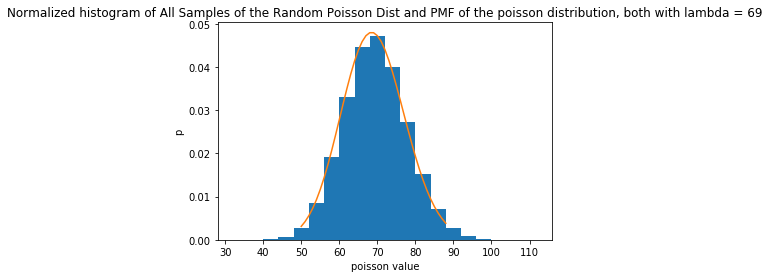

In [6]:
pl.hist(data.ravel(), bins=20, normed = True)

pl.xlabel("poisson value")
pl.ylabel("p")
pl.title("Normalized histogram of All Samples of the Random Poisson Dist and PMF of the poisson distribution, \
both with lambda = 69")

x = np.arange(poisson.ppf(.01, lam), poisson.ppf(.99, lam))


pl.plot(x, scipy.stats.poisson.pmf(x, lam), '-', ms=8, label='poisson pmf')

### Generate Array of Means

In [9]:
means = np.zeros(N)
for i in range(0, N):
    means[i] = data[i].mean()

### Generate Array of Z-Scores + Plot Histogram of Z Scores

In [12]:
z = np.zeros((N,N))

z = (lam - means) * np.sqrt(N)/np.sqrt(lam)

z = z.ravel()

Text(0.5,1,'Histogram of all z scores')

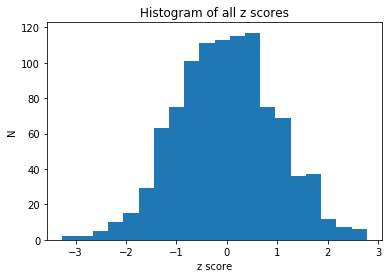

In [17]:
pl.hist(z, bins = 20)

pl.xlabel("z score")
pl.ylabel("N")
pl.title("Histogram of all z scores")

### Testing Fit

In [18]:
mean, std = scipy.stats.norm.fit(z)

In [21]:
print(mean, std)
print("The mean is close to 0 and the standard deviation is close to 1, which would suggest the distribution of z\
scores is  close to the normal distribution.")

-0.00951733734534 0.982727069309
The mean is close to 0 and the standard deviation is close to 1, which would suggest the distribution of zscores is  close to the normal distribution.


In [20]:
print(scipy.stats.anderson(z, "norm"), scipy.stats.kstest(z, "norm"))

AndersonResult(statistic=0.16989591193168962, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])) KstestResult(statistic=0.021023804912636557, pvalue=0.7686941804443933)


For Anderson: The test statistic is less than the critical value for p = .05, therefore the null hypothesis cannot be rejected, and we cannot conclude that the Z score is not of the normal distribution.

For KS test: The p-value is greater than .05, therefore the null hypothesis cannot be rejected, and we cannot conclude that the Z score is not of the normal distribution.